In [1]:
# import all needed model and functions 
from ThematicTextClassify.TextClassifier import *
from ThematicTextClassify.Preprocessing import *

/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df =pd.read_csv('Categorized_Links.csv')

In [3]:
df.groupby(['Category', 'Subcategory']).count()

Title  \
Category       Subcategory                                                 
Consumption    Food Consumed                                          74   
               Food Spending                                          17   
               Nutrient & non nutrient intakes                        34   
Distribution   Access and Equity Issues, Education Information...      9   
               Food Acquired                                           4   
               Food Disposition                                       23   
               Food Price                                              7   
               Other                                                   7   
Health Outcome Food Insecurity                                        15   
               Health Status, outcomes, morbidity, mortality          41   
Supply         Consumer Demand                                        11   
               Food Availability & Storage                            20   
               Food Production/Hunting/Harvesting                     80   
               Food for Sale / Intended for Consumption                8   
               Imports and Exports                                    21   
Utilization    Nutrient & non-nutrient metabolic utilization          38   
               Supplements and Natural Health Products                 8   

                                                                   Description  \
Category       Subcategory                                                       
Consumption    Food Consumed                                                74   
               Food Spending                                                17   
               Nutrient & non nutrient intakes                              34   
Distribution   Access and Equity Issues, Education Information...            9   
               Food Acquired                                                 4   
               Food Disposition                                             23   
               Food Price                                                    7   
               Other                                                         7   
Health Outcome Food Insecurity                                              15   
               Health Status, outcomes, morbidity, mortality                41   
Supply         Consumer Demand                                              11   
               Food Availability & Storage                                  20   
               Food Production/Hunting/Harvesting                           80   
               Food for Sale / Intended for Consumption                      8   
               Imports and Exports                                          21   
Utilization    Nutrient & non-nutrient metabolic utilization                38   
               Supplements and Natural Health Products                       8   

                                                                   Link  \
Category       Subcategory                                                
Consumption    Food Consumed                                         74   
               Food Spending                                         17   
               Nutrient & non nutrient intakes                       34   
Distribution   Access and Equity Issues, Education Information...     9   
               Food Acquired                                          4   
               Food Disposition                                      23   
               Food Price                                             7   
               Other                                                  7   
Health Outcome Food Insecurity                                       15   
               Health Status, outcomes, morbidity, mortality         41   
Supply         Consumer Demand                                       11   
               Food Availability & Storage                           20   
             

# Sources used 
* 
https://github.com/bertcarremans/TwitterUSAirlineSentiment/blob/master/source/Predicting%20sentiment%20with%20text%20features.ipynb
* https://github.com/chiwang0503/App-Review-Analysis/blob/master/Topic_Modelling_by_year.ipynb

* https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python 

## Source to consider for lemmatizing pos tagging 


# Preprocessing Text Function

In [4]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = "Another way of achieving this task"
tokens = word_tokenize(text)
lmtzr = WordNetLemmatizer()

for token, tag in pos_tag(tokens):
    lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
    print(token, "=>", lemma)

Another => Another
way => way
of => of
achieving => achieve
this => this
task => task


# Why we Lemmatize and not Stem

In [5]:
WordNetLemmatizer().lemmatize("computation", pos='v')

'computation'

In [6]:
WordNetLemmatizer().lemmatize("computer", pos='v')

'computer'

In [7]:
stemmer.stem("computation")

'comput'

In [8]:
stemmer.stem("computer")

'comput'

In [9]:
stemmer.stem(WordNetLemmatizer().lemmatize("computation", pos='v'))

'comput'

In [10]:
stemmer.stem(WordNetLemmatizer().lemmatize("computer", pos='v'))

'comput'

# Preprocessing

In [11]:
# add the title and description column together to form a text document
df['Text'] = df['Title']+ df['Description']
df = df.dropna(subset= ['Text'], axis = 0)

# preprocess the newly defined Text column
df['Processed Text'] = df['Text'].map(preprocess_text)

# If after preprocessing there are empty lists we drop 
# we check for len of list > 0 
print(len(df[df['Processed Text'].map(lambda d: len(d)) == 0]))

# We've checked that there are no empty lists
print(len(df))

df['processed_string'] =  [' '.join(text) for text in df['Processed Text']]

0
417


# Before dropping duplicates our distribution of documents by category

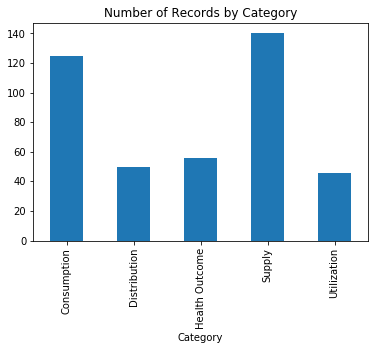

Category
Consumption       125
Distribution       50
Health Outcome     56
Supply            140
Utilization        46
Name: Text, dtype: int64

In [12]:
df.groupby('Category').count()['Text'].plot.bar()
plt.rcParams["figure.figsize"] = (9,6)
plt.title("Number of Records by Category")
plt.show()
df.groupby('Category').count()['Text']

# 5-fold CV
# Accuracy = $\frac{TP + TN}{Total}$
# Precision = $\frac{TP}{TP+FP} = \frac{TP}{Actual \  Results}$  
# Recall = $\frac{TP}{TP+FN} = \frac{TP}{Predicted \ Results}$
# f1-score =$ \frac{2*(Recall * Precision)}{ (Recall + Precision)}$

# Notes aside before for evaluating performance indices
* Precision = $\frac{TP}{TP+FP}$  
    * Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
* Recall (Sensitivity) = $\frac{TP}{TP+FN}$ 
    *  Recall is the ratio of correctly predicted positive observations to the all observations in actual class 
* F1 Score = $\frac{2*(Recall * Precision)}{ (Recall + Precision)}$ (Weighted average of Precision and Recall)
* Accuracy = $\frac{TP+TN}{TP+FP+FN+TN}$

## What matters to us more is if the model is predicting the true positives correctly, which is predicting `Consumption` correctly. We can pay less attention to the results of `other` performance indices.

## Model - Selection will be based on mostly the precision, recall and f1 score of specific class we are working with and not on the performance indices of the `other` class. 

* Note:  The term Multinomial Naive Bayes simply lets us know that each 𝑝(𝑓𝑖|𝑐) is a multinomial distribution, rather than some other distribution.
* Multinomial Naive Bayes works well for text data, which can easily be turned into word counts

# We will label the class as Consumption or other on the entire data set based on the already labeled Category column

In [13]:
df['Class'] = ""
df['Class'] = df.apply(lambda df: 'Consumption' if (df['Category'] == 'Consumption') else df['Class'], axis =1)
df['Class'] = df.apply(lambda df: 'Other' if (df['Category'] != 'Consumption') else df['Class'], axis =1)
df = df.reset_index(drop=True)


In [14]:
length_of_text = []
for i in df['Processed Text']:
    length_of_text.append(len(i))
df['length_of_text'] = length_of_text 
df.groupby('Category').describe()

length_of_text                                           \
                        count       mean        std   min    25%   50%   
Category                                                                 
Consumption             125.0  81.504000  64.190822   9.0  28.00  66.0   
Distribution             50.0  40.840000  26.287547   9.0  18.00  36.5   
Health Outcome           56.0  83.000000  70.352101  10.0  30.75  64.5   
Supply                  140.0  44.292857  32.409586   8.0  17.75  42.0   
Utilization              46.0  97.913043  75.703758  11.0  32.25  86.0   

                               
                   75%    max  
Category                       
Consumption     118.00  338.0  
Distribution     62.75  121.0  
Health Outcome  112.00  338.0  
Supply           61.00  224.0  
Utilization     130.00  338.0

In [15]:
df = df.sort_values('Class')
df = df.reset_index(drop=True)
df = df.drop_duplicates(['Link'],keep= 'first')
df = df.reset_index(drop=True)
len(df)

301

In [16]:
df['Class'].value_counts()

Other          188
Consumption    113
Name: Class, dtype: int64

In [17]:
length_of_text = []
for i in df['Processed Text']:
    length_of_text.append(len(i))
df['length_of_text'] = length_of_text 

In [18]:
df.groupby('Category').describe()

length_of_text                                             \
                        count        mean        std   min    25%    50%   
Category                                                                   
Consumption             113.0   85.017699  65.781834   9.0  29.00   72.0   
Distribution             27.0   43.555556  25.198189  13.0  20.00   39.0   
Health Outcome           42.0   69.785714  58.432590  10.0  23.50   54.5   
Supply                  110.0   45.981818  33.870499   8.0  18.25   44.0   
Utilization               9.0  105.888889  37.866359  58.0  85.00  109.0   

                               
                   75%    max  
Category                       
Consumption     134.00  338.0  
Distribution     66.50   98.0  
Health Outcome   82.50  276.0  
Supply           61.75  224.0  
Utilization     113.00  183.0

In [19]:
df['length_of_text'].describe()

count    301.000000
mean      65.531561
std       54.499937
min        8.000000
25%       22.000000
50%       53.000000
75%       87.000000
max      338.000000
Name: length_of_text, dtype: float64

# To make sure there is enough records in the test data set we find the optimal seed

`for i in range(0,40000): 
    try: 
        text_train, text_test, class_train, class_test = train_test_split(df,df['Class'], test_size=0.15, random_state=i)
        if class_test.value_counts()[1]  >= 11:
            print(i,"this is it look here")
        else:
            print(None,i)
    except: 
        pass`

## Create Training and Test data 

In [20]:
text_train, text_test, class_train, class_test = train_test_split(df,
                                                    df['Class'],
                                                    test_size=0.20, 
                                                    random_state=509)

In [21]:
class_train.value_counts()

Other          149
Consumption     91
Name: Class, dtype: int64

In [22]:
class_test.value_counts()

Other          39
Consumption    22
Name: Class, dtype: int64

# The average document length

In [23]:
count = 0
for i in df['Processed Text']:
    count += len(i)
print(count/len(df))

65.53156146179403


# Most Frequent words for Consumption
* Maybe useful when searching for documents

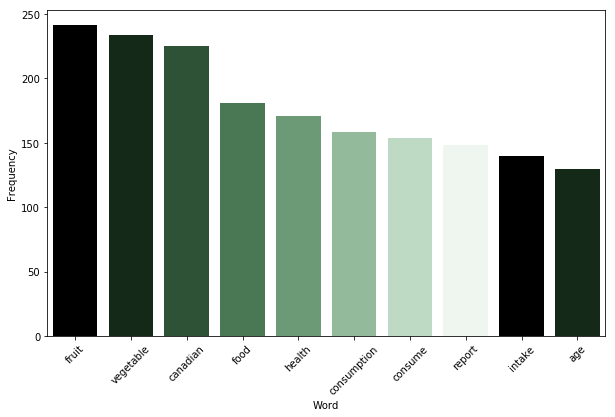

In [24]:
cv = CountVectorizer()
consumption = df[df['Class'] == 'Consumption']['processed_string']
bow_consumption = cv.fit_transform(consumption)
freq_consumption = dict(zip(cv.get_feature_names(), np.asarray(bow_consumption.sum(axis=0)).ravel()))
count_consumption = pd.DataFrame(collections.Counter(freq_consumption).most_common(10), columns = ['Word', 'Frequency'])
fig, ax = plt.subplots(figsize=(10, 6))
colour = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)
g = sns.barplot(x="Word", y="Frequency", data=count_consumption, palette=colour, ax=ax)
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=45)
plt.show();

# General Check on Accuracy using CountVectorizer

/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

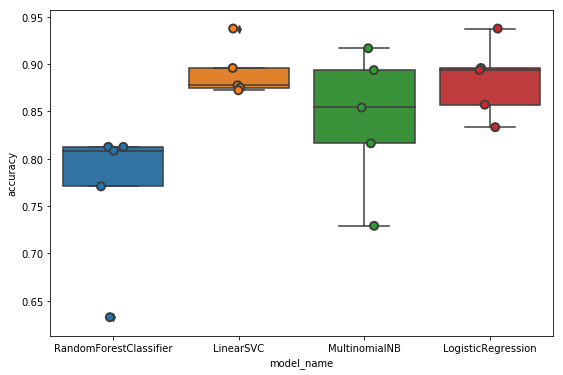

model_name
LinearSVC                 0.891645
LogisticRegression        0.883485
MultinomialNB             0.841989
RandomForestClassifier    0.767399
Name: accuracy, dtype: float64

In [25]:
countvect = CountVectorizer()
features = countvect.fit_transform(text_train['processed_string']).toarray()
labels = class_train

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),LinearSVC(max_iter = 3000),MultinomialNB(),LogisticRegression(random_state=0)]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
import warnings
warnings.filterwarnings('ignore')
plt.show()
cv_df.groupby('model_name').accuracy.mean()

# General Check on Accuracy using tfidf

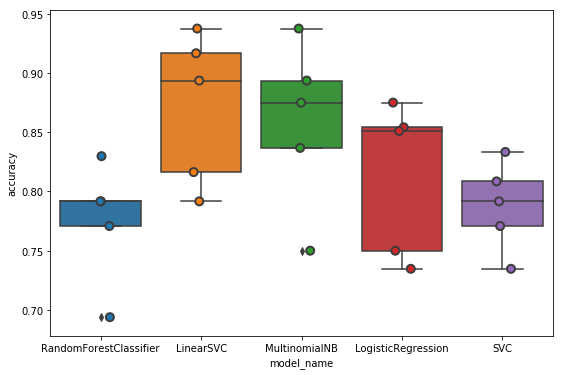

model_name
LinearSVC                 0.871155
LogisticRegression        0.812985
MultinomialNB             0.858570
RandomForestClassifier    0.775566
SVC                       0.787808
Name: accuracy, dtype: float64

In [26]:
tfidf = TfidfVectorizer() 
features = tfidf.fit_transform(text_train['processed_string']).toarray()
labels = class_train

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),LinearSVC(max_iter = 2000),MultinomialNB(),LogisticRegression(random_state=0), SVC(kernel ='linear', degree = 1, C = 0.25)]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
import warnings
warnings.filterwarnings('ignore')
plt.show()
cv_df.groupby('model_name').accuracy.mean()

# After comparing the cross validated accuracy of the models suppose we would like to use LinearSVC for our classifier, but we have yet to observe the performance indices and tune parameters

# Multinomial Naive Bayes (CountVectorizer)

In [27]:
mnb = MultinomialNB()
logreg = LogisticRegression()
countvect = CountVectorizer()
mnb_countvect = grid_vect(mnb, param_mnb, text_train, class_train, text_test, class_test, parameters_text=param_vect_countvect, vect=countvect)


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:   42.8s finished


done in 43.518s


Best CV score: 0.887
Best parameters set:
	clf__alpha: 0.25
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 1
	features__pipe__vect__ngram_range: (2, 3)
Cross Validated Test score with best_estimator_: 0.885


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.83      0.86      0.84        22
       Other       0.92      0.90      0.91        39

    accuracy                           0.89        61
   macro avg       0.87      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy Score:  0.8852459016393442


# Multinomial Naive Bayes (TFIDF)

In [41]:
mnb_countvect = grid_vect(mnb, param_mnb, text_train, class_train, text_test, class_test, parameters_text=param_vect_tfidf, vect=tfidf)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  1.9min finished


done in 116.672s


Best CV score: 0.892
Best parameters set:
	clf__alpha: 0.5
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 1
	features__pipe__vect__ngram_range: (2, 3)
	features__pipe__vect__norm: None
Cross Validated Test score with best_estimator_: 0.902


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.86      0.86      0.86        22
       Other       0.92      0.92      0.92        39

    accuracy                           0.90        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.90      0.90        61

Accuracy Score:  0.9016393442622951


# Logistic Regression (CountVectorizer)

In [29]:
logreg_countvect = grid_vect(logreg, param_logreg, text_train, class_train, text_test, class_test, parameters_text=param_vect_countvect, vect=countvect)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.3min finished


done in 79.026s


Best CV score: 0.904
Best parameters set:
	clf__C: 1.0
	clf__penalty: 'l2'
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 1
	features__pipe__vect__ngram_range: (1, 3)
Cross Validated Test score with best_estimator_: 0.967


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.95      0.95      0.95        22
       Other       0.97      0.97      0.97        39

    accuracy                           0.97        61
   macro avg       0.96      0.96      0.96        61
weighted avg       0.97      0.97      0.97        61

Accuracy Score:  0.9672131147540983


# Logisitc Regression (TFIDF)


In [42]:
logreg_tfidf = grid_vect(logreg, param_logreg, text_train, class_train, text_test, class_test, parameters_text=param_vect_tfidf, vect=tfidf)


Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:  3.9min finished


done in 236.959s


Best CV score: 0.904
Best parameters set:
	clf__C: 1.0
	clf__penalty: 'l2'
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 3
	features__pipe__vect__ngram_range: (1, 3)
	features__pipe__vect__norm: None
Cross Validated Test score with best_estimator_: 0.918


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.90      0.86      0.88        22
       Other       0.93      0.95      0.94        39

    accuracy                           0.92        61
   macro avg       0.91      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

Accuracy Score:  0.9180327868852459


# Linear SVC (CountVectorizer)

In [31]:
linsvc = LinearSVC() 
lscv_countvect = grid_vect(linsvc, param_linearsvc, text_train, class_train, text_test, class_test, parameters_text=param_vect_countvect, vect= countvect)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  1.1min finished


done in 67.747s


Best CV score: 0.917
Best parameters set:
	clf__C: 0.15
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 1)
Cross Validated Test score with best_estimator_: 0.951


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.91      0.95      0.93        22
       Other       0.97      0.95      0.96        39

    accuracy                           0.95        61
   macro avg       0.94      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61

Accuracy Score:  0.9508196721311475


# Linear SVC (TFIDF)

In [40]:
linsvc = LinearSVC() 
lscv_tfidf = grid_vect(linsvc, param_linearsvc, text_train, class_train, text_test, class_test, parameters_text=param_vect_tfidf, vect=tfidf)


Fitting 5 folds for each of 675 candidates, totalling 3375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3375 out of 3375 | elapsed:  3.4min finished


done in 204.204s


Best CV score: 0.908
Best parameters set:
	clf__C: 0.05
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 3)
	features__pipe__vect__norm: None
Cross Validated Test score with best_estimator_: 0.902


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.90      0.82      0.86        22
       Other       0.90      0.95      0.92        39

    accuracy                           0.90        61
   macro avg       0.90      0.88      0.89        61
weighted avg       0.90      0.90      0.90        61

Accuracy Score:  0.9016393442622951


# Random Forest Classifier (CountVectorizer)

In [33]:
RandF = RandomForestClassifier()
Randomforest_countvect = grid_vect(RandF, param_RandF, text_train, class_train, text_test, class_test, parameters_text=param_vect_countvect, vect=countvect)


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 12.2min finished


done in 733.814s


Best CV score: 0.833
Best parameters set:
	clf__max_depth: 4
	clf__n_estimators: 200
	clf__random_state: 3
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 3
	features__pipe__vect__ngram_range: (1, 1)
Cross Validated Test score with best_estimator_: 0.820


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.92      0.55      0.69        22
       Other       0.79      0.97      0.87        39

    accuracy                           0.82        61
   macro avg       0.86      0.76      0.78        61
weighted avg       0.84      0.82      0.81        61

Accuracy Score:  0.819672131147541


# Random Forest Classifier (TFIDF)

In [30]:
Randomforest_tfidf = grid_vect(RandF, param_RandF, text_train, class_train, text_test, class_test, parameters_text=param_vect_tfidf, vect=tfidf)


Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

done in 1955.855s


Best CV score: 0.833
Best parameters set:
	clf__max_depth: 4
	clf__n_estimators: 200
	clf__random_state: 3
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 3
	features__pipe__vect__ngram_range: (1, 1)
	features__pipe__vect__norm: None
Cross Validated Test score with best_estimator_: 0.820


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.92      0.55      0.69        22
       Other       0.79      0.97      0.87        39

    accuracy                           0.82        61
   macro avg       0.86      0.76      0.78        61
weighted avg       0.84      0.82      0.81        61

Accuracy Score:  0.819672131147541


# XGboost (CountVecotrizer)

In [28]:
countvect = CountVectorizer()
xgb = XGBClassifier(random_state=1995,colsample_bytree=0.3, subsample=0.3)
XGboost_tfidf = grid_vect(xgb, param_xgb, text_train, class_train, text_test, class_test, parameters_text=param_vect_countvect, vect=countvect)


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed: 43.1min finished


done in 2586.751s


Best CV score: 0.900
Best parameters set:
	clf__max_depth: 4
	clf__seed: 1
	clf__subsample: 0.7
	features__pipe__vect__max_df: 0.75
	features__pipe__vect__min_df: 3
	features__pipe__vect__ngram_range: (1, 2)
Cross Validated Test score with best_estimator_: 0.934


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.95      0.86      0.90        22
       Other       0.93      0.97      0.95        39

    accuracy                           0.93        61
   macro avg       0.94      0.92      0.93        61
weighted avg       0.94      0.93      0.93        61

Accuracy Score:  0.9344262295081968


# XGboost (TFIDF)

In [25]:
tfidf = TfidfVectorizer() 
xgb = XGBClassifier(random_state=1995,colsample_bytree=0.3, subsample=0.3)
XGboost_countvect = grid_vect(xgb, param_xgb, text_train, class_train, text_test, class_test, parameters_text=param_vect_tfidf, vect=tfidf)


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 57.5min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 80.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 105.7min
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed: 127.5min finished
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: Deprecati

done in 7660.886s


Best CV score: 0.883
Best parameters set:
	clf__max_depth: 6
	clf__seed: 2
	clf__subsample: 0.7
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 1
	features__pipe__vect__ngram_range: (1, 2)
Cross Validated Test score with best_estimator_: 0.934


Classification Report Test Data


              precision    recall  f1-score   support

 Consumption       0.95      0.86      0.90        22
       Other       0.93      0.97      0.95        39

    accuracy                           0.93        61
   macro avg       0.94      0.92      0.93        61
weighted avg       0.94      0.93      0.93        61

Accuracy Score:  0.9344262295081968
